In [1]:
from text_extractor import get_masked_image
from PIL import Image

C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\convert\layer.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:212.)
  layer.weight.data = torch.from_numpy(numpy_helper.to_array(weight))
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\convert\attribute.py:101: UserWarning: Pytorch's interpolate uses no coordinate_transformation_mode=asymmetric. Result might differ.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\operations\resize.py:16: UserWarning: Pytorch's interpolat

In [69]:
224 * 2 * 1.6

716.8000000000001

In [126]:
import numpy as np
import onnx
import torchvision.transforms as transforms
from onnx2pytorch import ConvertModel
from PIL import Image
from scipy.signal import convolve2d

transform = transforms.Compose(
    [
        transforms.Resize((358, 224)),
        transforms.ToTensor(),
    ]
)


onnx_model = onnx.load("end2end.onnx")
pytorch_model = ConvertModel(onnx_model)


def get_masked_image(image, threshold=0.3, mask_padding=5, bw="True"):
    torch_image = transform(image).unsqueeze(0)

    out = pytorch_model(torch_image)
    mask = np.where(out.squeeze(0, 1).detach().numpy() > threshold, 1, 0)

    kernel_size = 2 * mask_padding + 1
    kernel = np.ones((kernel_size, kernel_size), dtype=int)

    mask = convolve2d(mask, kernel, mode="same", boundary="fill", fillvalue=0)

    image_sized = np.array(image.resize(mask.shape[::-1]))

    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    result = np.multiply(image_sized, mask)
    output_image = np.where(result == 0, 0, image_sized)

    if bw:
        return Image.fromarray(np.uint8(output_image)).convert("L")
    else:
        return Image.fromarray(np.uint8(output_image))


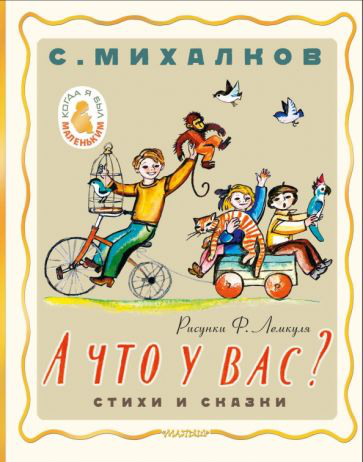

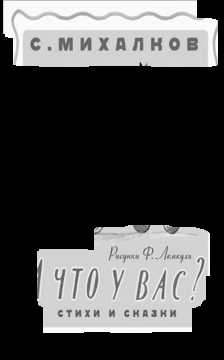

In [212]:
image = Image.open('pics/1010219.png').convert('RGB')
display(image)
masked_image = get_masked_image(image, threshold=0.3, mask_padding=20)
display(masked_image)

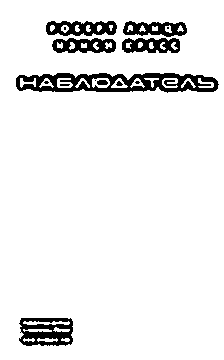

'000000 00900\n©0000 00099\n\nНАБЛЮЛАТеЛЬ\n'

In [148]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = np.array(masked_image)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img, 3)
 
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
 
display(Image.fromarray(th3))

import pytesseract

pytesseract.pytesseract.tesseract_cmd = "C:\Program Files\Tesseract-OCR/tesseract.exe"
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'
text = pytesseract.image_to_string(th3, lang= 'rus', config=tessdata_dir_config)
text

'опыд овуіоел\n'

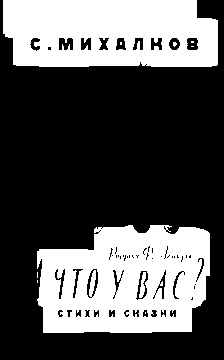

In [213]:
from PIL import Image, ImageEnhance, ImageFilter

enhancer = ImageEnhance.Contrast(masked_image)
img = enhancer.enhance(1)

#img = img.filter(ImageFilter.BLUR)

#img = img.filter(ImageFilter.MinFilter(3))
#img = img.filter(ImageFilter.MinFilter) 

# Преобразуем в черно-белый рисунок:
thresh = 140
fn = lambda x : 255 if x > thresh else 0
res = img.convert('L').point(fn, mode='1')
display(res)

In [214]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "C:\Program Files\Tesseract-OCR/tesseract.exe"
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'
text = pytesseract.image_to_string(res, lang= 'rus', config=tessdata_dir_config)
text

'©.миИхАЛнНов\n\n'

In [215]:
text.lower().strip()

'©.миихалннов'

In [182]:
from e5_embedding import E5LargeEmbeddingFunction

emb_func = E5LargeEmbeddingFunction()
emb_func.change_mode('passage')

In [183]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [184]:
for i in emb_func(text.lower().strip()):
    print(len(i))

1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024


In [185]:
len(emb_func('приключения капитана врунгеля'))

29

In [188]:
text.lower().strip()

'наблюлдатеелль'

In [192]:
from sklearn.metrics.pairwise import cosine_similarity

In [196]:
cosine_similarity([emb_func('свидетель')[0]], [emb_func('приключения капитана врунгеля')[0]])

array([[0.94560561]])

In [187]:
cos_sim(emb_func(text.lower().strip())[0], emb_func('роберт ланца нэнси кресс наблюдатель')[0])

0.9424328992379505

In [197]:
from numpy.linalg import norm

In [205]:
norm(np.array(emb_func(text.lower().strip())[0]) - np.array(emb_func('роберт ланца нэнси кресс наблюдатель')[0]), ord=2)

0.33931431782738175

In [161]:
emb_func(text.lower().strip())[0]

[0.021197699010372162,
 -0.014811704866588116,
 -0.027262981981039047,
 -0.041543181985616684,
 0.021694321185350418,
 -0.01670956239104271,
 0.0005434381891973317,
 0.07170478254556656,
 0.042523398995399475,
 -0.0005350759602151811,
 0.034736696630716324,
 0.03504345193505287,
 -0.05374804139137268,
 -0.04842059686779976,
 -0.034764066338539124,
 -0.04157071188092232,
 -0.01529922429472208,
 0.023042408749461174,
 0.011150918900966644,
 -0.0019449003739282489,
 0.03236895054578781,
 -0.013749612495303154,
 -0.04762828350067139,
 -0.014590091072022915,
 -0.016385048627853394,
 0.0004911809810437262,
 -0.02280297689139843,
 -0.0026099171955138445,
 -0.0021483339369297028,
 -0.05712239071726799,
 -0.019928546622395515,
 0.009854571893811226,
 -0.03081567771732807,
 -0.05661549046635628,
 -0.01029412355273962,
 0.0587397925555706,
 0.04867906495928764,
 0.05547870695590973,
 -0.01883973553776741,
 0.03512673079967499,
 -0.022144315764307976,
 0.05370024964213371,
 0.002629087306559086,
 

In [3]:
import pytesseract
from pytesseract import Output

d = pytesseract.image_to_boxes(masked_image, output_type=Output.DICT)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.